In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#importing data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_survived = pd.read_csv("gender_submission.csv")

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
print("Shape of df_train :",df.shape)
print("Shape of df_test :",df_test.shape)
print("Shape of df_survived :",df_survived.shape)

Shape of df_train : (891, 12)
Shape of df_test : (418, 11)
Shape of df_survived : (418, 2)


In [19]:
# The target column "survived" is in "train" but not in "test", so i will be merging the two datasets to have the target column in both.
df_train["train/test"] = "Train"
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [20]:
# Adding "Survived" column to test dataset.
df_test = df_test.merge(df_survived)
df_test.insert(1,"survived",value=df_test["Survived"])
df_test.drop(columns="Survived",inplace=True)
df_test.rename(columns={"survived":"Survived"}, inplace=True)

#  I will add a new column which called train/test in order not to confuse the train and test datasets. I will split them later.
df_test["train/test"] = "Test"
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [21]:
# Creating general dataframe that includes train and test datasets.
df = pd.concat([df_train,df_test])
print("Shape of df :",df.shape)
df.head()

Shape of df : (1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train/test   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [23]:
# I want to take Passenger ID as an index.
df.set_index("PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [24]:
# Statistical informations about dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [28]:
# Checking for missing values
print(df.isna().all())

Survived      False
Pclass        False
Name          False
Sex           False
Age           False
SibSp         False
Parch         False
Ticket        False
Fare          False
Cabin         False
Embarked      False
train/test    False
dtype: bool


In [26]:
df.isnull().all(axis=1)

PassengerId
1       False
2       False
3       False
4       False
5       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Length: 1309, dtype: bool

In [27]:
# Rate of missing values by columns.
df.isna().sum() / df.shape[0] * 100

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.091673
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Cabin         77.463713
Embarked       0.152788
train/test     0.000000
dtype: float64

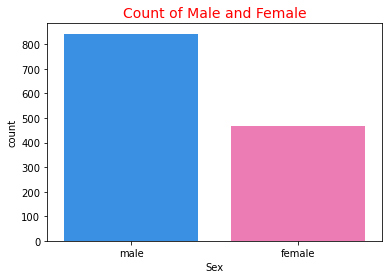

In [33]:
# I drop the "Cabin" because it has an error rate of 77.5 approx. 
ax = sns.countplot(data=df, x="Sex", palette=sns.color_palette(["#1e90ff","#ff69b4"]))
plt.title("Count of Male and Female", size=14, color="red");

From the analysis, the number count of male is 55% greater than female

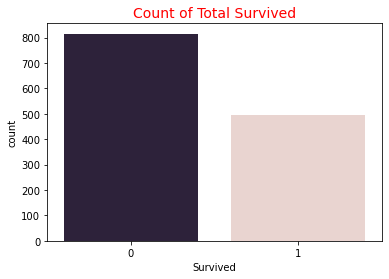

In [38]:
ax = sns.countplot(data=df, x="Survived", palette=sns.cubehelix_palette(2,reverse=True))
plt.title("Count of Total Survived", size=14, color="red");

Few of the passengers survived

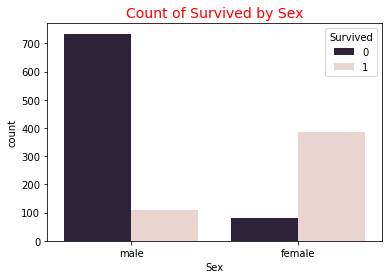

In [36]:
ax = sns.countplot(data=df, x="Sex", hue="Survived",palette=sns.cubehelix_palette(2,reverse=True))
plt.title("Count of Survived by Sex", size=14, color="red");

The plot shows that the number of female that survived are greater than the number of male. In reverse, greater percentage of male died than women. 

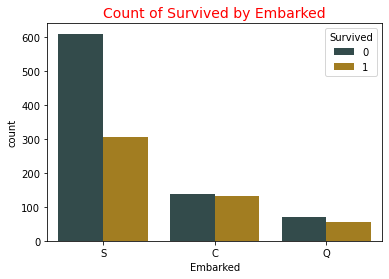

In [37]:
ax = sns.countplot(data=df, x="Embarked", hue="Survived",palette=sns.color_palette(["#2f4f4f","#b8860b"]))
plt.title("Count of Survived by Embarked", size=14, color="red");

The count of survival in Cherbourg and Queenstown are almost equal to the death count.
The survival count in Southampton is half the deaceased passenger. Meaning that the number of deceased passengers are twice the survived passengers.

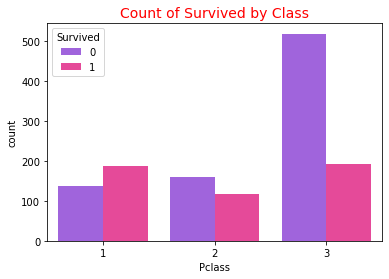

In [42]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived",palette=sns.color_palette(["#a050f0","#ff309a"]))
plt.title("Count of Survived by Class", size=14, color="red");

The death rate is high in Class 3, while the survival rate is higher in Class 1, then other classes.

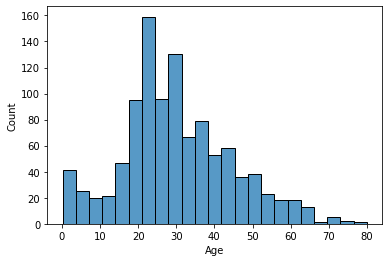

In [43]:
sns.histplot(x=df.Age);

The passengers are mostly between the age of 15-45...

In [49]:
#Scaling the fare column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))

<AxesSubplot:xlabel='features', ylabel='values'>

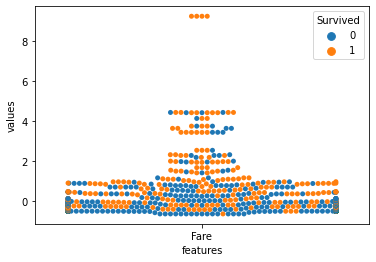

In [51]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(df[["Survived","Fare"]],id_vars="Survived",var_name="features",value_name="values")
sns.swarmplot(data=df_melt, x="features",y="values",hue="Survived")

In [52]:
# Converting the categorical features to numeric.
df["Sex"] = [1 if each == "male" else 0 for each in df.Sex]
df.replace({"C":0, "Q":1,"S":2}, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.503402,NaN,2.0,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.734222,C85,0.0,Train
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.490356,NaN,2.0,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.382778,C123,2.0,Train
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.487940,NaN,2.0,Train


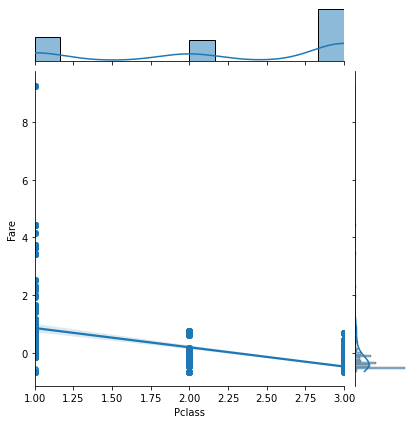

In [53]:
sns.jointplot(data=df, x="Pclass", y="Fare", kind="reg");

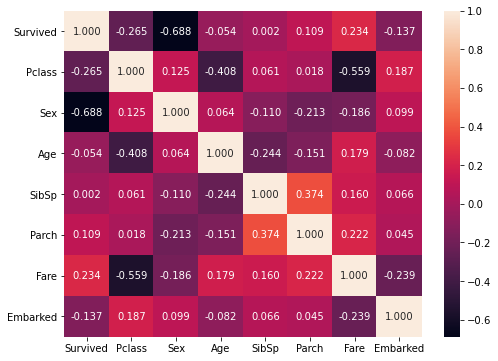

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".3f"); 

In [55]:
# Dropping the columns we have talked about above.
df.drop(columns=["Name","SibSp","Ticket","Age","Fare","Cabin"],inplace=True)

In [56]:
 # Missing values analysis
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Parch         0
Embarked      2
train/test    0
dtype: int64

In [57]:
df.head()

,Survived,Pclass,Sex,Parch,Embarked,train/test
PassengerId,,,,,,
1,0,3,1,0,2.0,Train
2,1,1,0,0,0.0,Train
3,1,3,0,0,2.0,Train
4,1,1,0,0,2.0,Train
5,0,3,1,0,2.0,Train


In [58]:
categorical_features = ["Pclass","Sex","Parch","Embarked"]
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [59]:
df.head()

,Survived,train/test,Pclass_2,Pclass_3,Sex_1,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_1.0,Embarked_2.0
PassengerId,,,,,,,,,,,,,,
1,0,Train,0,1,1,0,0,0,0,0,0,0,0,1
2,1,Train,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Train,0,1,0,0,0,0,0,0,0,0,0,1
4,1,Train,0,0,0,0,0,0,0,0,0,0,0,1
5,0,Train,0,1,1,0,0,0,0,0,0,0,0,1


In [60]:
df_train = df[df["train/test"] == "Train"]
df_test = df[df["train/test"] == "Test"]

In [61]:
# Determine the train_x, train_y, test_x, test_y

train_x = df_train.drop(columns=["Survived","train/test"])
train_y = df_train["Survived"]

test_x = df_test.drop(columns=["Survived","train/test"])
test_y = df_test["Survived"]

print("train_x shape :",train_x.shape)
print("train_y shape :",train_y.shape)
print("test_X shape :",test_x.shape)
print("test_y shape :",test_y.shape)

train_x shape : (891, 12)
train_y shape : (891,)
test_X shape : (418, 12)
test_y shape : (418,)


In [62]:
 # Determine the x and y
x = df.drop(columns=["Survived","train/test"])
y = df["Survived"]

In [64]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg0 = LogisticRegression()
grid= {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(logreg0,grid,cv=10)
logreg_cv.fit(x,y)
print("Best parameters of Logistic Regression :",logreg_cv.best_params_)

Best parameters of Logistic Regression : {'C': 100.0, 'penalty': 'l2'}


In [65]:
logreg = LogisticRegression(C=logreg_cv.best_params_["C"] , penalty=logreg_cv.best_params_["penalty"])
logreg.fit(train_x,train_y) 
print("Logistic Regression Accuracy :",logreg.score(test_x,test_y))

Logistic Regression Accuracy : 0.9832535885167464


#Classification Report and Confusion Matrix

#Logistic Regression

0.9832535885167464

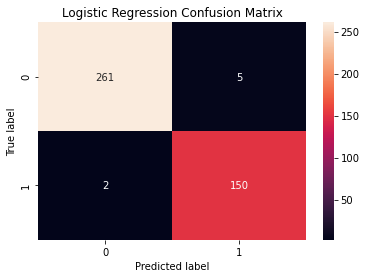

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

logreg_prediction = logreg.predict(test_x)
plt.figure()
sns.heatmap(confusion_matrix(test_y, logreg_prediction), annot=True, fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix")
logreg.score(test_x, test_y)

In [73]:
print(classification_report(test_y, logreg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.97      0.99      0.98       152

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [74]:
#Logistic Regression Curve
logreg_pred_proba = logreg.predict_proba(test_x)

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])

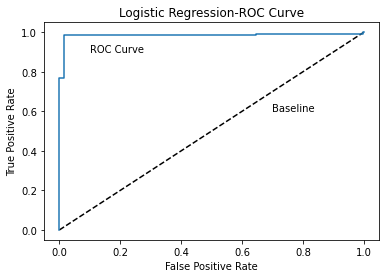

In [84]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression-ROC Curve")
plt.text(0.7, 0.6, "Baseline")
plt.text(0.1, 0.9, "ROC Curve")
plt.show()